In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trai

In [5]:
model.compile(optimizer='Adam', #'SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs=10)                       # , batch_size=512, validation_data=(x_test, y_test)) hist변수를 사용하기 위해
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3363 - accuracy: 0.8990
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1592 - accuracy: 0.9519
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1246 - accuracy: 0.9627
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1064 - accuracy: 0.9675
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0925 - accuracy: 0.9713
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0840 - accuracy: 0.9742
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0774 - accuracy: 0.9766
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0721 - accuracy: 0.9777
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0658 - accuracy: 0.9793
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.062

[0.07283422350883484, 0.9778000116348267]

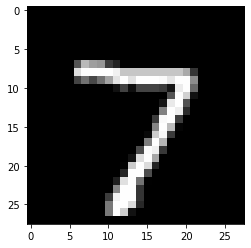

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(x_test[0], cmap='gray')

In [ ]:
x_test[0].shape

(28, 28)

In [ ]:
np.array(model(x_test[0, :, :].reshape(1,28,28))).round(3)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
probs = model(x_test[0].reshape(1,28,28))
np.argmax(probs)

7

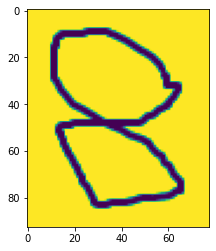

In [ ]:
import cv2
img = cv2.imread('/content/drive/My Drive/imgs/for_test_8.png', cv2.IMREAD_GRAYSCALE )
plt.imshow(img)

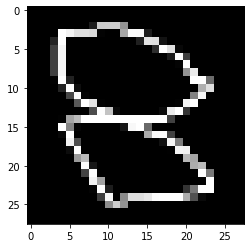

In [ ]:
test_img = cv2.resize(255-img, (28,28))
plt.imshow(test_img, cmap='gray')

In [ ]:
input = test_img.reshape(1,28,28)
prob = (np.array(model(input)).round(3))
print(prob)
np.argmax(prob)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


2